<a href="https://colab.research.google.com/github/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/blob/main/1_preprocessing_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1 - Preprocesamiento (EDA)

EDA: Exploratory data Analysis | Análisis exploratorio de datos

Los datos son la materia prima de toda investigación, entender cómo utilizarlos corresponde a una tarea crucial que todo investigador debe saber. El proceso de estudiar y explorar la data corresponde al procedimiento denominado EDA, el cual es el tema central de la clase de hoy. Además, este procedimiento involucra en la mayoría de los casos (por no decir todos) técnicas de preprocesamiento, que son elementos fundamentales para desarrollar el EDA. El contexto de cuales técnicas utilizar puede variar, pero en términos del ramo exploraremos aquellas orientadas a Machine Learning.

Receta EDA:
1.   Análisis descriptivo
2.   Ajuste de variables
3.   Detección de data faltante
4.   Identificación de outliers
5.   Correlación de variables



![EDA](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

## Importar librerias

Para comenzar debemos importar las librerias que nos apoyarán en este análisis

In [ ]:
# Biblioteca para manejar datos vectoriales
import numpy as np

# Módulo de preprocesamiento de datos
import sklearn.preprocessing

# Biblioteca para manejo de datos
import pandas as pd

# Visualización
import matplotlib.pyplot as plt

## 1) Análisis descriptivo

El primer paso para desarrollar el EDA corresponde al procedimiento de entender la información básica del conjunto de datos, en donde se busca estudiar:

*   Tipo de variables / Data Types
*   Distribuciones
*   Medidas de tendencia central [Media, Mediana, Moda]
*   Medidas de dispersion [Rango, Varianza, Desviación estándar, Cuartiles]

### Cargar Datos

Se cargan datos reales de temperaturas registradas a través del tiempo en el mundo ([Link](https://climateknowledgeportal.worldbank.org/download-data)).

In [ ]:
!wget -q https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/temperature.csv -O temperature.csv

In [ ]:
#Utilizamos Pandas y su función read_csv para leer el archivo csv.
data = pd.read_csv("temperature.csv")
data.head(5)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG
3,12.93970,1991,Apr,Afghanistan,AFG
4,17.07550,1991,May,Afghanistan,AFG


En esta base de datos se pueden ver datos Numéricos (**Temperature, Year**) y Categóricos (**Month, Country ISO3**), según los tipos de datos y la distribución de estos se pueden aplicar distintas técnicas de preprocesamiento.



![Datos](https://365datascience.com/resources/blog/thumb@1024_xzk3rl06exk-data-types.webp)

In [ ]:
#Veamos los datos numéricos
data.describe()

,Temperature,Year
count,59904.000000,59904.000000
mean,19.140288,2003.500000
std,10.214126,7.500063
min,-30.859000,1991.000000
25%,13.528100,1997.000000
50%,23.307450,2003.500000
75%,26.253350,2010.000000
max,38.566900,2016.000000


![Datos](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBpQdPI7joDW6zvDQG_jieJTmxFYy8GP4Jiw&s)

In [ ]:
#Veamos los datos categoricos
df_unique = data.nunique().to_frame().reset_index()
df_unique

,index,0
0,Temperature,51047
1,Year,26
2,Month,12
3,Country,192
4,ISO3,192


Text(0, 0.5, 'Temperatura C°')

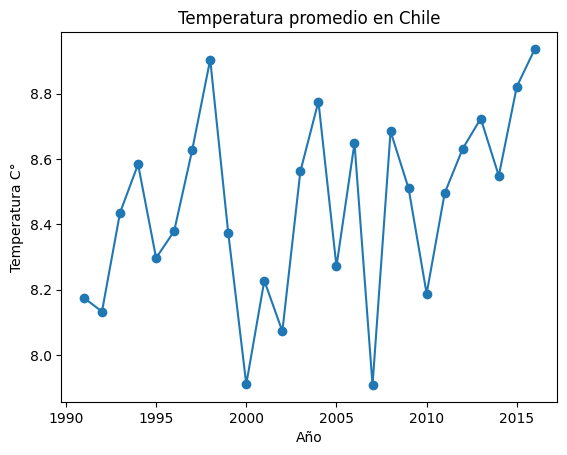

In [ ]:
#Veamos el promedio de temperaturas por año en Chile
mean_Chile = data[data.Country == "Chile"].groupby("Year").mean(numeric_only=True)
plt.plot(mean_Chile.index.to_numpy(),mean_Chile.values.flatten(), '-o')
plt.title("Temperatura promedio en Chile")
plt.xlabel("Año")
plt.ylabel("Temperatura C°")

## 2) Ajuste de variables

El ajuste de variables corresponde a todo el procedimiento de alterar los tipos de la data cruda. En general, cuando uno trabaja con data la información original está presente en formatos que no pueden ser utilizados, de modo que es imposible generar gráficos o entrenar modelos. Por ello, se realizan una serie de técnicas de preprocesamiento que permitan cambiar este hecho.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59904 entries, 0 to 59903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  59904 non-null  float64
 1   Year         59904 non-null  int64  
 2   Month        59904 non-null  object 
 3   Country      59904 non-null  object 
 4   ISO3         59904 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
data['Year'] = data['Year'].apply(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59904 entries, 0 to 59903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  59904 non-null  float64
 1   Year         59904 non-null  object 
 2   Month        59904 non-null  object 
 3   Country      59904 non-null  object 
 4   ISO3         59904 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
data['Year'] = data['Year'].apply('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59904 entries, 0 to 59903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  59904 non-null  float64
 1   Year         59904 non-null  float32
 2   Month        59904 non-null  object 
 3   Country      59904 non-null  object 
 4   ISO3         59904 non-null  object 
dtypes: float32(1), float64(1), object(3)
memory usage: 2.1+ MB


## 3) Detección y Tratamiento de Datos Faltantes

La presencia de data Nula (NaN en pandas) es un hecho común en los conjuntos de datos, este fenómeno ocurre por diversas razones desde un error en la toma de estos, hasta por el uso de múltiples programas para procesarlos (inconsistencias entre programas). Este problema cobra un mayor peso, cuando se considera que es imposible entrenar modelos teniendo la presencia de data nula.

Técnicas comunes para enfrentar este problema:
*   Eliminar datos nulos [Fila, Columnas]
*   Imputar datos [Cero, Media, Ponderación, Otro valor]

Dataset House Prices: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
import missingno as msno

# Cargamos dataset con missing data
df_con_missing_data = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/house.csv",index_col="Id",)
df_con_missing_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Verificamos el numero de datos nulos presentes
df_con_missing_data.isnull().sum().sort_values(ascending = False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

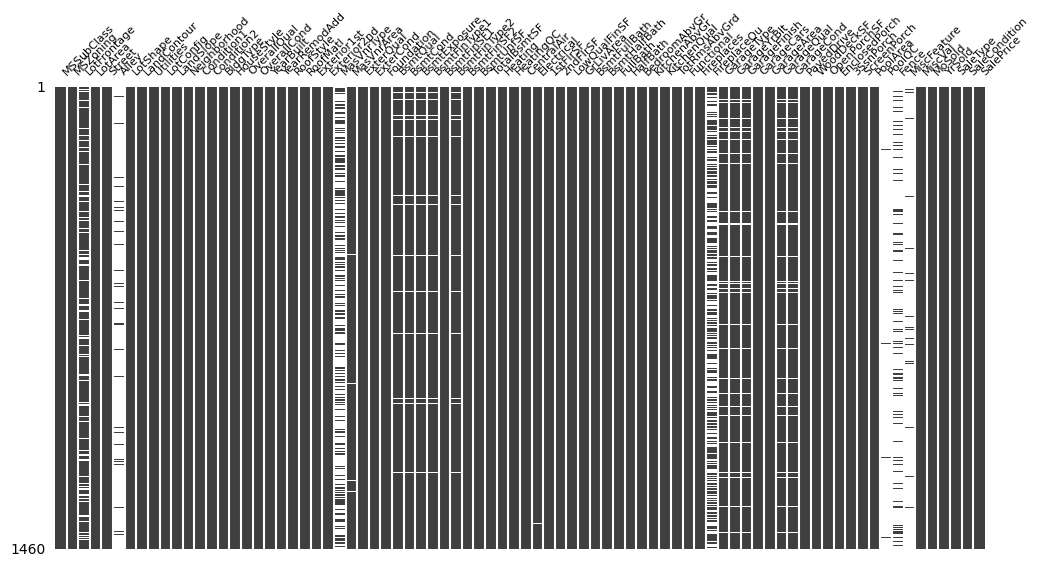

In [ ]:
# Graficamos datos nulos
fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df_con_missing_data,fontsize=8, ax=ax, sparkline=False, labels=True)

In [ ]:
# Ejemplo eliminar filas
df_con_filas_eliminadas = df_con_missing_data.dropna(axis=0)
df_con_filas_eliminadas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


<Axes: >

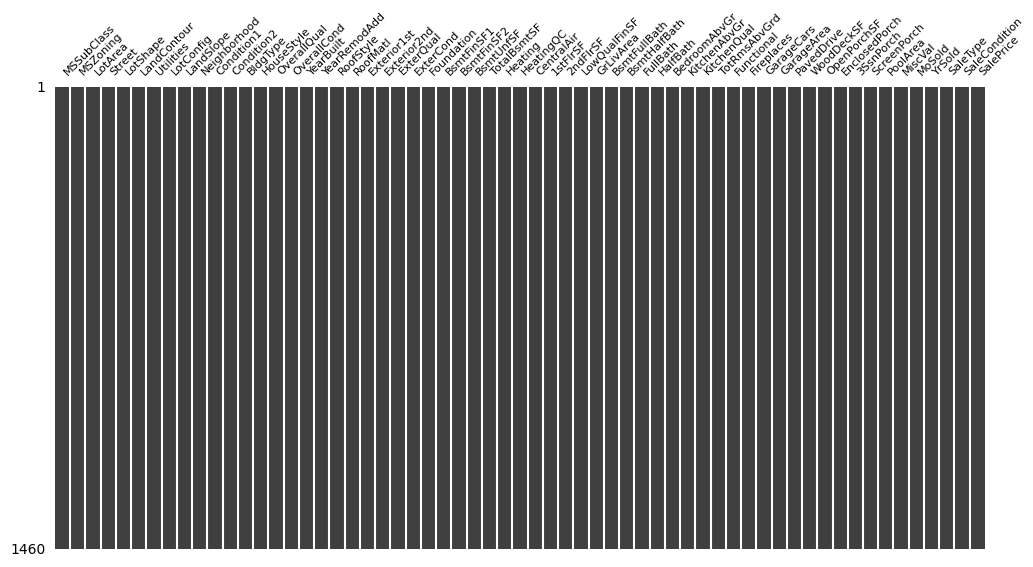

In [ ]:
# Ejemplo eliminar columnas
df_con_cols_eliminadas = df_con_missing_data.dropna(axis=1)

# Graficamos datos nulos
fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df_con_cols_eliminadas,fontsize=8, ax=ax, sparkline=False, labels=True)

In [ ]:
# Ejemplo imputar datos
df_imputar = df_con_missing_data.fillna(0)
df_imputar

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
# Ejemplo imputar datos
df_imputar_2 = df_con_missing_data.fillna({'Alley':0})
df_imputar_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Actividad

### Generar Datos Sintéticos

Generaremos un conjunto de datos sintético con el cual exploraremos las distintas técnicas de preprocesamiento de datos para aprendizaje de máquinas.

In [ ]:
# Fijamos la semilla del generador de datos al azar para obtener resultados consistentes
np.random.seed(11)

In [ ]:
# Generamos datos sintéticos utilizando una distribución normal de media loc y desviación estándar scale
x1 = np.random.normal(loc=100, scale=30, size=10000)

In [ ]:
# Generamos datos sintéticos utilizando una distribución uniforme entre low y high.
x2 = np.random.uniform(low=1000, high=2000, size=10000)

In [ ]:
# Generamos un conjunto de datos con outliers desde la variable anterior.
x3 = x2.copy()
x3[np.random.randint(low=0,high=x2.size,size=1000)] = np.random.uniform(low=5, high=6, size=1000)

In [ ]:
# Generamos una variable que contiene distintos grupos de datos determinados por distintas distribuciones normales.
x4 = np.hstack([
           np.random.normal(loc=1000, scale=300, size=1500),
           np.random.normal(loc=2000, scale=300, size=2000),
           np.random.normal(loc=3000, scale=300, size=3000),
           np.random.normal(loc=4000, scale=300, size=3500),
           ])

# Agrupamos nuestras variables en una matriz bidimensional.
x = np.stack([x1,x2,x3,x4],axis=1)

Una de las características que deben tener nuestras variables para una correcta aplicación de ciertos algoritmos de aprendizaje de máquinas es que todas deben estar en el mismo rango. Con la siguiente visualización se puede evaluar que todas las variables cuentan con distintos rangos y distribuciones. Una de las convencionas más utilizadas es escalar todas nuestras variables hacia valores entre 0 y 1 o que se distribuyan con una distribución normal de media 0 y desviación estándar 1.

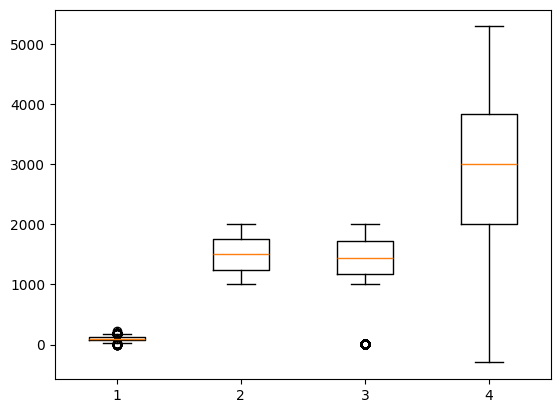

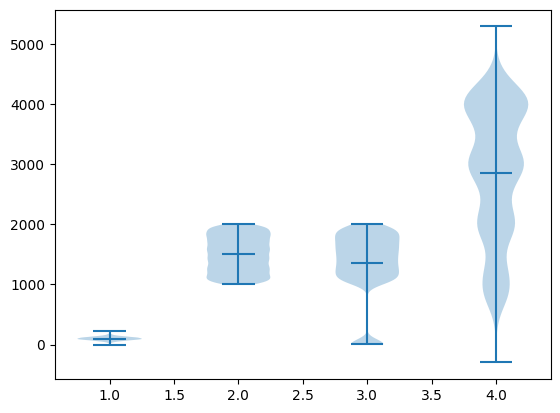

In [ ]:
# Visualizamos nuestro conjunto de datos a través de un box plot para evaluar los rangos y distribuciones de nuestras variables.
plt.boxplot(x)
plt.show()
print("\n \n")
#Como se ve con Violinplot
plt.violinplot(x, showmeans=True)
plt.show()

### Actividad 1:
Nuestra primera variable se distribuye de manera normal, pero está desplazada del 0 y además tiene una desviación estándar distinta a 1. Programe una función que escale **esta variable** y a la **temperatura** de los datos reales a una distribución estándar de media 0 y desviación estándar 1. Este proceso de escalamiento se llama Standard Scaling.

Datos Sintéticos 



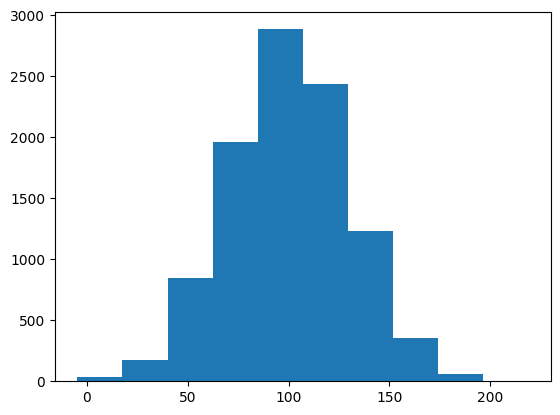


Temperatura 



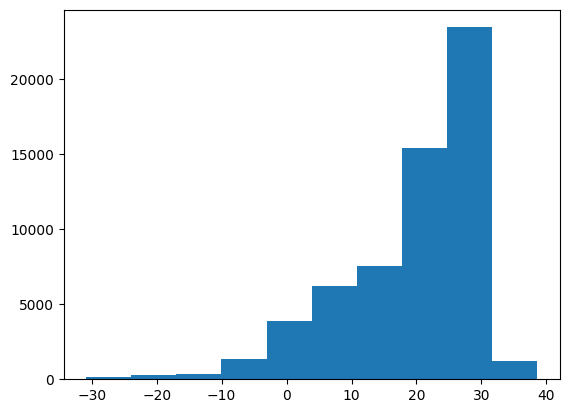

In [ ]:
# La variable x es un conjunto de arrelos, por lo qué para acceder necesitamos indicales el índice que nos interesa (este caso es 0)
print("Datos Sintéticos \n")
plt.hist(x[:,0])
plt.show()
print()

# Por otro lado, utilizando Pandas podemos acceder a los datos que nos interesa utilizando el nombre de la variable (este caso Temperature)
print("Temperatura \n")
plt.hist(data["Temperature"])
plt.show()

In [ ]:
def standard_scaler(a):
  a_scaled = (a - a.mean()) / (a.std())
  return a_scaled

Datos Sintéticos 



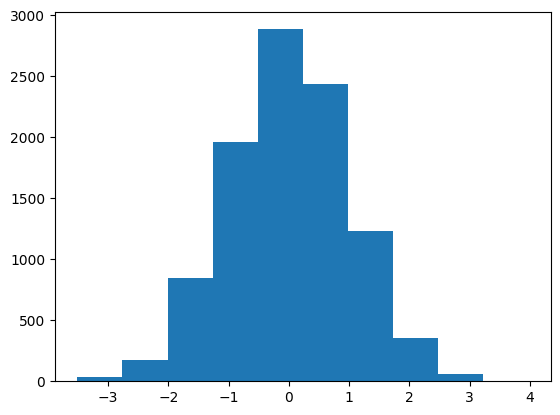


Temperatura 



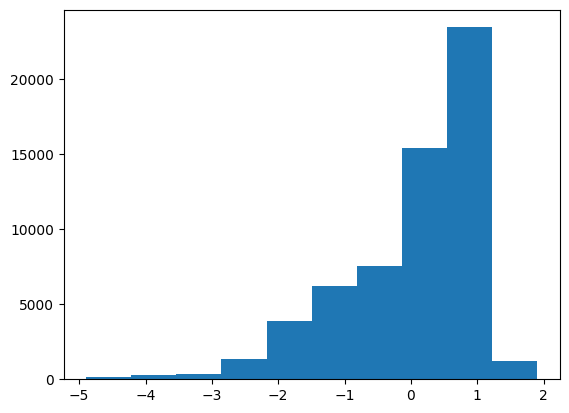

In [ ]:
print("Datos Sintéticos \n")
plt.hist(standard_scaler(x[:,0]))
plt.show()
print()

print("Temperatura \n")
plt.hist(standard_scaler(data["Temperature"]))
plt.show()

### Actividad 2:
Nuestra segunda variable se distribuye de manera uniforme, pero tiene un rango muy distinto a las demás variables. Programe una función que escale **esta variable** y el **año registrado** hacia valores entre 0 y 1, donde el menor valor sea escalado a 0 y el mayor a 1. Este proceso de escalamiento se llama Min-Max Scaling.

Datos Sintéticos 



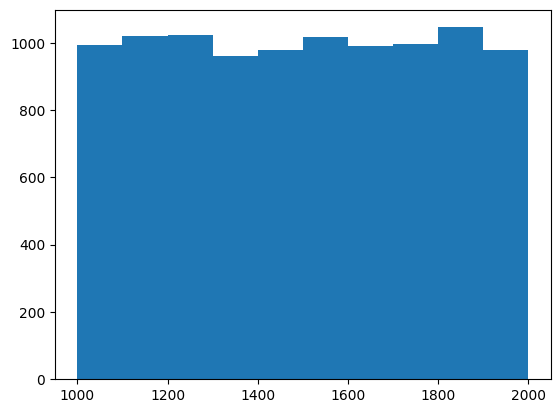


Año 



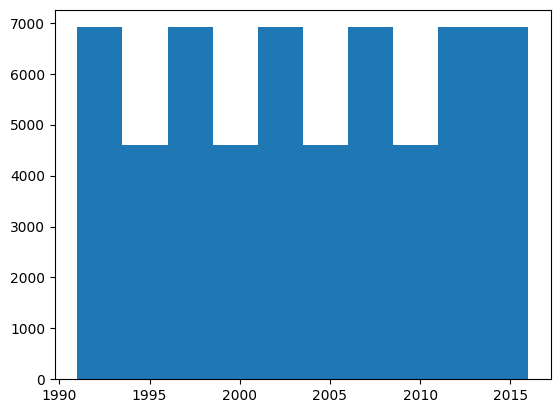

In [ ]:
print("Datos Sintéticos \n")
plt.hist(x[:,1])
plt.show()
print()

print("Año \n")
plt.hist(data["Year"])
plt.show()

In [ ]:
def min_max_scaler(a):
  a_scaled = (a - a.min()) / (a.max() - a.min())
  return a_scaled

Datos Sintéticos 



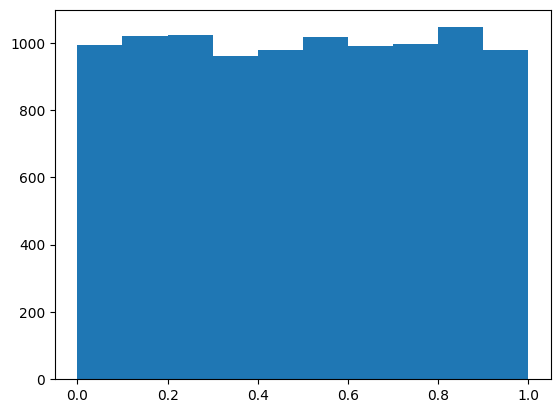


Año 



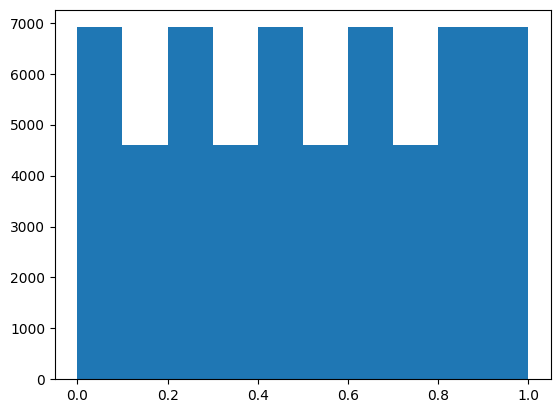

In [ ]:
print("Datos Sintéticos \n")
plt.hist(min_max_scaler(x[:,1]))
plt.show()
print()

print("Año \n")
plt.hist(min_max_scaler(data["Year"]))
plt.show()

### Actividad 3:
Es muy frecuente que dentro de nuestros conjuntos de datos encontremos outliers. La variable 3 tiene una distribución uniforme pero cuenta con valores outliers. ¿Cómo se comporta el Min-Max Scaling en este caso?, aplique otro método de escalamiento que sea robusto a outliers.

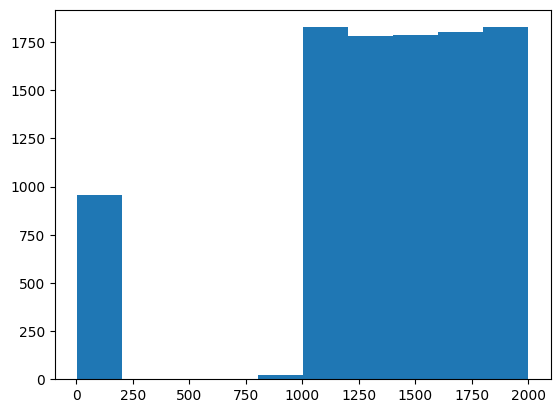

In [ ]:
plt.hist(x[:,2])
plt.show()

In [ ]:
# Hint https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

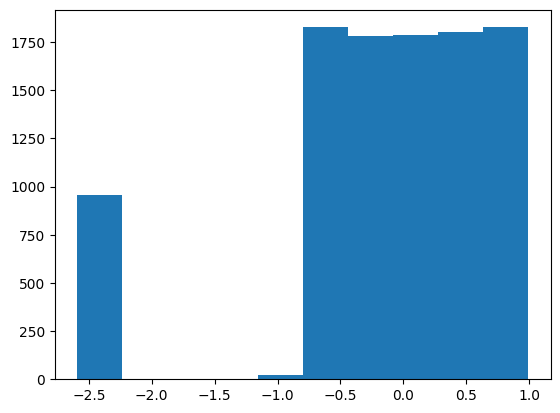

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()
plt.hist(scaler.fit_transform(x[:,2].reshape(-1, 1)))
plt.show()

### Actividad 4:
Otro método de preprocesamiento que se utiliza en ciencia de datos es la transformación de variables continuas hacia valores discretos. Valore la calidad de la discretización aplicada sobre la cuarta variable y modifique el proceso de discretización para que funcione óptimamente.

**Hint: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)**

In [ ]:
plt.hist(x[:,3], bins=100)
plt.show()

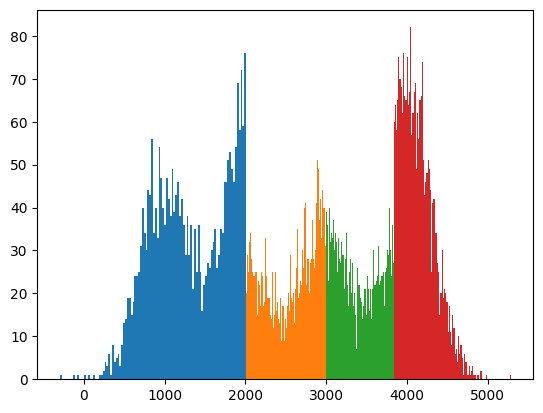

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

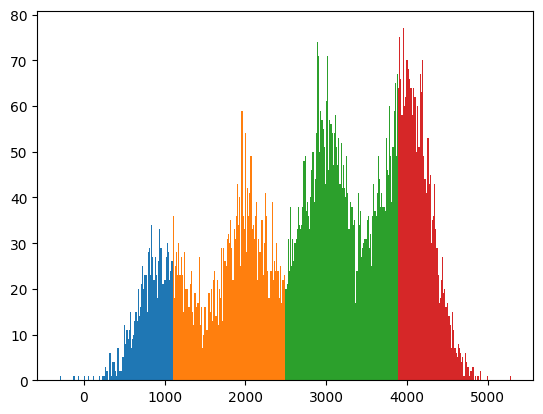

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

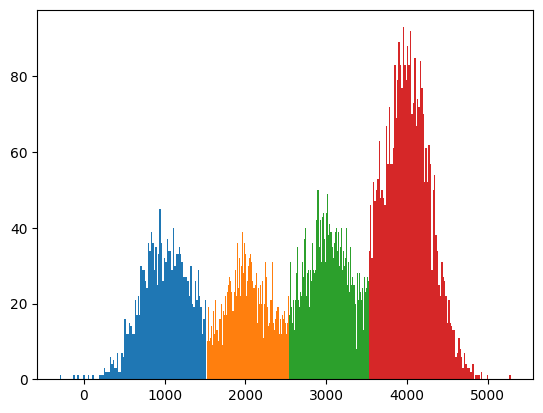

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='kmeans')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

### Valores de propiedades desde atributos de las casas

Este conjunto de datos relaciona los valores de venta de propiedades con atributos de las mismas. Cada una de las características de las casas tienen una alta diferencia de rango entre si. Evalue el mejor método de escalamiento apra cada variable y aplíquelo.

In [ ]:
real_estate = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/real_estate.csv", delimiter=";")

In [ ]:
real_estate.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
import seaborn as sns

def plot_distribution(df,title):
    """
    Esta función recibe un dataframe de características y un titulo.
    Retorna un gráfico de violines para cada una de las características.
    """
    sns.violinplot(
        data=df.melt(), # Cambiamos el esquema del dataframe para que sea solo de 2 columnas
        y="variable",
        x="value",
        cut=0
    )
    plt.title(title)
    plt.show()

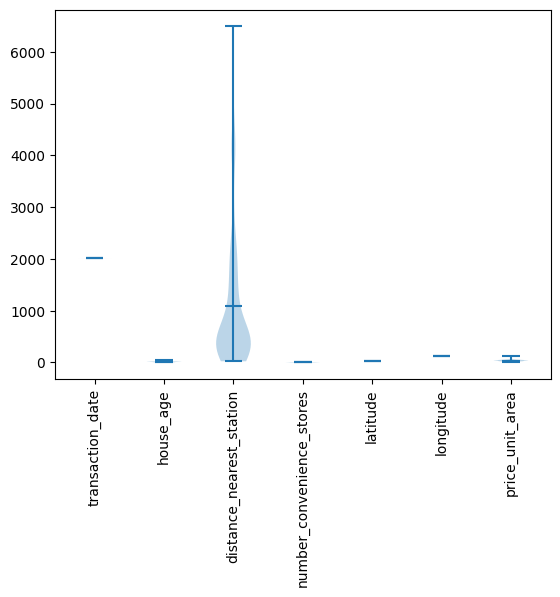

In [ ]:
columns = real_estate.columns.to_list()
plt.violinplot(real_estate, showmeans=True)
plt.xticks(range(1, len(columns)+1), columns, rotation=90)
plt.show()

In [ ]:
features = real_estate[columns[0:len(columns)-1]]
features_scaled = sklearn.preprocessing.RobustScaler().fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=columns[0:len(columns)-1])
features_scaled

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
0,-0.500000,0.831373,-0.349673,1.2,0.821861,0.105782
1,-0.500000,0.177778,-0.159351,1.0,0.639225,0.057819
2,0.833332,-0.146405,0.059876,0.2,1.131788,0.346912
3,0.666666,-0.146405,0.059876,0.2,1.131788,0.346912
4,-0.666668,-0.580392,-0.087268,0.2,0.572120,0.250986
...,...,...,...,...,...,...
409,-0.333334,-0.125490,3.081481,-0.8,-2.044275,-2.287779
410,-1.000000,-0.549020,-0.344885,1.0,0.223452,0.293693
411,0.166666,0.141176,-0.086923,0.6,0.562435,0.080815
412,-0.333334,-0.418301,-0.332563,0.2,-0.301626,0.134034


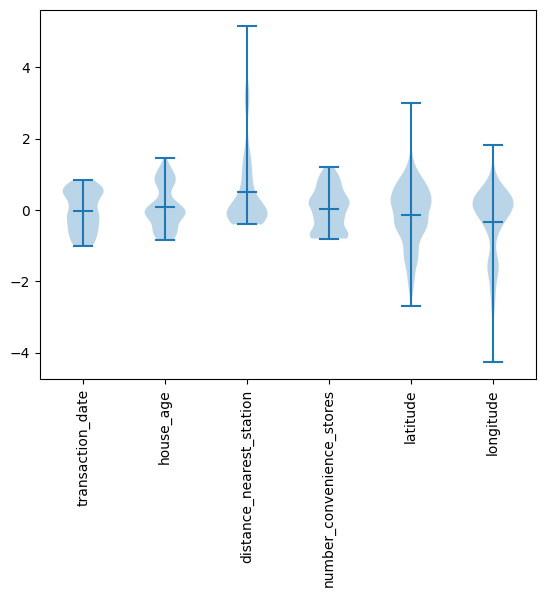

In [ ]:
columns = features_scaled.columns.to_list()
plt.violinplot(features_scaled, showmeans=True)
plt.xticks(range(1, len(columns)+1), columns, rotation=90)
plt.show()

### Actividad: Bonus

Realice un EDA del dataset de House Prices.

Para ello:
1.   Determine cuáles son las variables categóricas y numéricas.
2.   Analice la distribución de los precios de venta (SalePrice).
3.   Determine el número de datos nulos y realice modificaciones para eliminarlos (por imputación o quitar).



In [ ]:
# Cargamos dataset con missing data
df_bonus = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/house.csv",index_col="Id",)
df_bonus.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
variables_numericas = df_bonus.select_dtypes(include=['int64','float64']).columns
variables_categoricas = df_bonus.select_dtypes(include=['object']).columns

print(f'Las variables numericas son: {variables_numericas}, correspondiente a {len(variables_numericas)} columnas')
print(f'Las variables categoricas son: {variables_categoricas}, correspondiente a {len(variables_categoricas)} columnas')

Las variables numericas son: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object'), correspondiente a 37 columnas
Las variables categoricas son: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQ

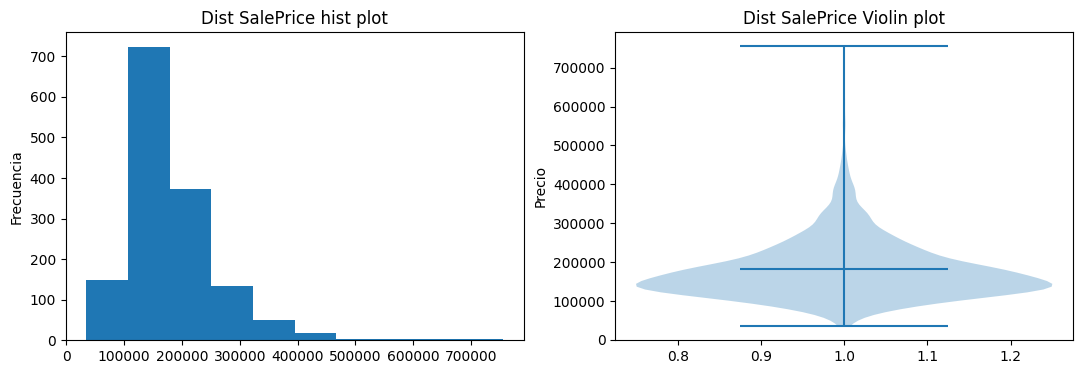

In [ ]:
# Grafico de precios
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# Grafico de histograma
ax[0].hist(df_bonus["SalePrice"])
ax[0].set_title('Dist SalePrice hist plot')
ax[0].set_ylabel('Frecuencia')

# Grafico de violin
ax[1].violinplot(df_bonus["SalePrice"], showmeans=True)
ax[1].set_title('Dist SalePrice Violin plot')
ax[1].set_ylabel('Precio')
plt.show()

In [ ]:
df_bonus['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: >

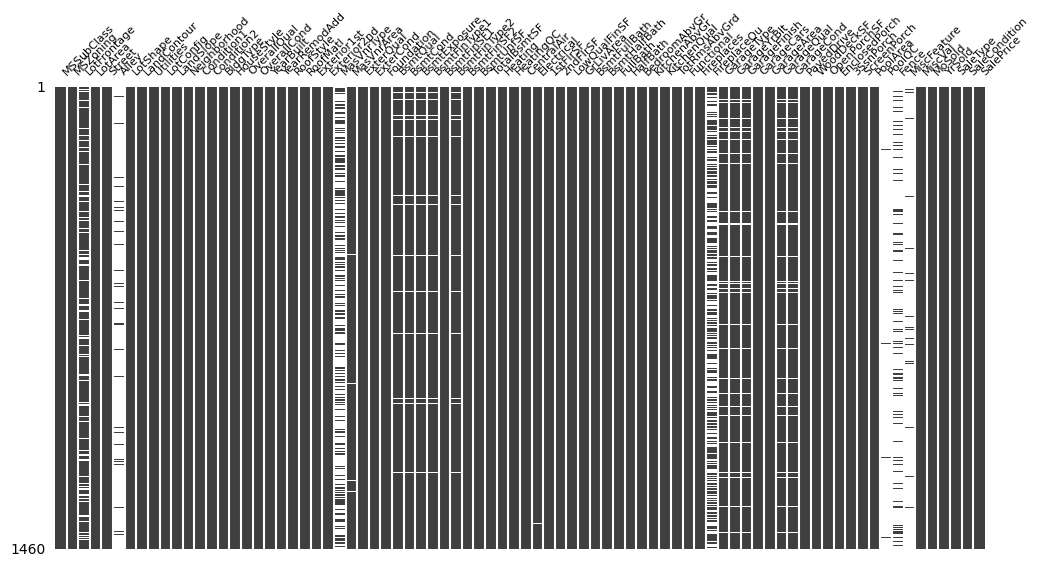

In [ ]:
# Generar nuevo df con nuevo set de columnas
# Nuevo conjunto de columnas
fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df_bonus,fontsize=8, ax=ax, sparkline=False, labels=True)

In [ ]:
# Analizamos el porecentaje de missing values por columna
df_bonus_missing = df_bonus.isnull().sum().sort_values(ascending = False)
df_bonus_missing = pd.DataFrame(df_bonus_missing).rename(columns={0:'missing_values'})
df_bonus_missing['missing_percentage [%]'] = round((df_bonus_missing['missing_values']/df_bonus.shape[0])*100,2)

# Filtramos las columnas que tienen mas del 40% de nulos
Filtro_sobre_40 = df_bonus_missing[df_bonus_missing['missing_percentage [%]'] > 40]
Filtro_sobre_40

,missing_values,missing_percentage [%]
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26


<Axes: >

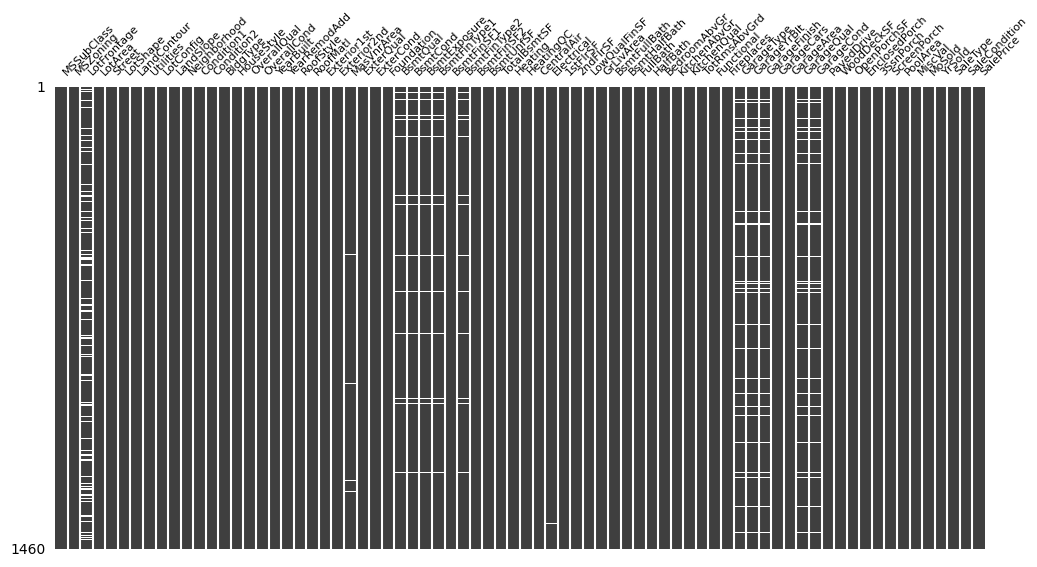

In [ ]:
# Quitamos dichas columnas
df_bonus_new = df_bonus.drop(Filtro_sobre_40.index, axis=1)
fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df_bonus_new,fontsize=8, ax=ax, sparkline=False, labels=True)

<Axes: >

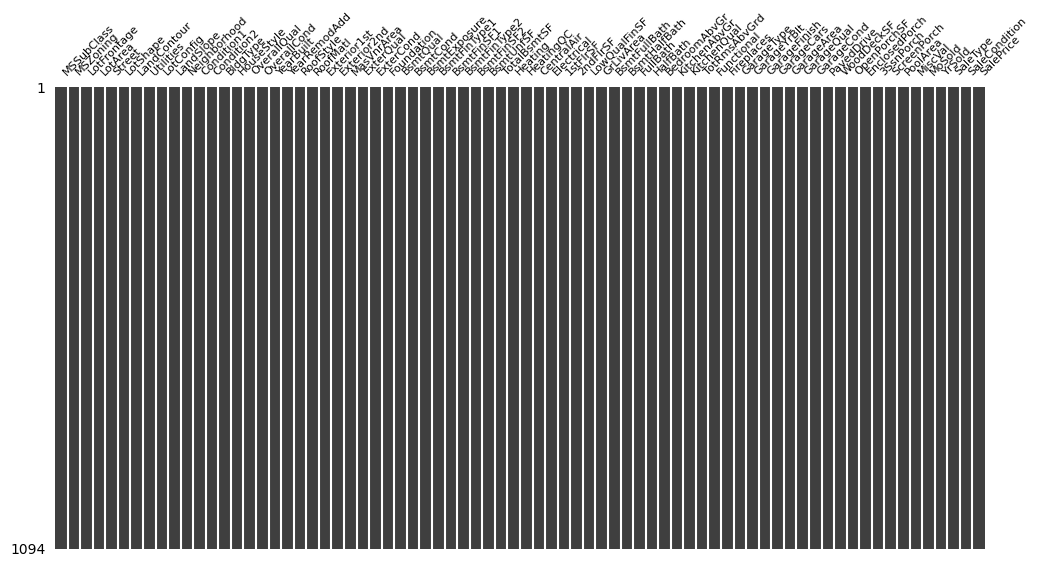

In [ ]:
# Finalmente eliminamos las filas con missing values
df_bonus_new = df_bonus_new.dropna(axis=0)
fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df_bonus_new,fontsize=8, ax=ax, sparkline=False, labels=True)

Esto es una forma, dentro de todo 400 datos pueden seguir siendo un costo muy alto. Aun así, se mantuvo un gran número de columnas (74/80) y se obtuvo un dataset listo para ser utilizado.